In [13]:
import pandas as pd
import geopandas as gpd
import movingpandas as mpd
from datetime import datetime, timedelta


In [14]:
route82 = pd.read_csv("101.csv")
route82['directionsss'] = 0
route82['location.coordinates'] = route82['location.coordinates'].apply(lambda x: x.strip('[]'))
route82['location.coordinates.lon'] = route82['location.coordinates'].apply(lambda x: x.split(',')[0])
route82['location.coordinates.lat'] = route82['location.coordinates'].apply(lambda x: x.split(',')[1])
route82['PrevTrackDt'] = pd.to_datetime(route82['LastTrackdt'])
route82.set_index('PrevTrackDt', inplace=True)
route82gpd = gpd.GeoDataFrame(route82, geometry=gpd.points_from_xy(route82['location.coordinates.lon'], route82['location.coordinates.lat']))
route82gpd = route82gpd.set_crs(4326)


c:\Users\dusng\mambaforge\lib\site-packages\geopandas\array.py:1406: UserWarning: CRS not set for some of the concatenation inputs. Setting output's CRS as WGS 84 (the single non-null crs provided).
  warnings.warn(


<AxesSubplot: >

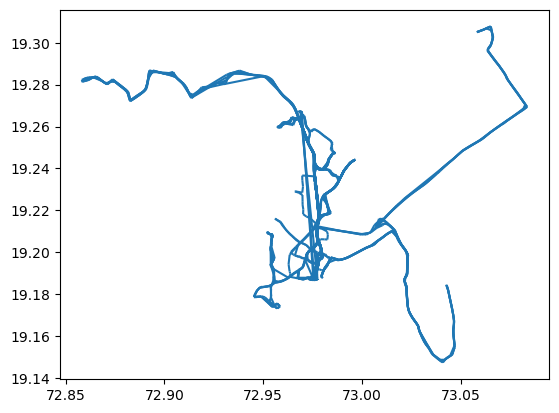

In [15]:
my_traj = mpd.Trajectory(route82gpd, 'LastTrackdt', 'location.coordinates.lon', 'location.coordinates.lat')
my_traj.plot()
# my_traj.to_linestring()

In [16]:
my_traj.add_direction(overwrite=True)
route_changed = pd.DataFrame(columns=['direction', 'LastTrackdt', 'location.coordinates.lon', 'location.coordinates.lat'])

for i in range(0,len(my_traj.df)-6):
    direction_difference = my_traj.df['direction'][i+1] - my_traj.df['direction'][i]
    if direction_difference > 160:
        route_changed = route_changed.append({'direction': my_traj.df['direction'][i], 'LastTrackdt': my_traj.df['LastTrackdt'][i], 'location.coordinates.lon': my_traj.df['location.coordinates.lon'][i], 'location.coordinates.lat': my_traj.df['location.coordinates.lat'][i]}, ignore_index=True)
# my_traj.df['speed']
# my_traj.df.directionsss.plot()
# my_traj.hvplot(c='directionsss', clim=(-360,360), line_width=7.0, tiles='OSM', cmap='Viridis', colorbar=True)
# print(my_traj.df.directionsss)
route_changedgpd = gpd.GeoDataFrame(route_changed, geometry=gpd.points_from_xy(route_changed['location.coordinates.lon'], route_changed['location.coordinates.lat']))
route_changedgpd = route_changedgpd.set_crs(4326)
route_changedgpd.explore()

c:\Users\dusng\mambaforge\lib\site-packages\geopandas\array.py:1406: UserWarning: CRS not set for some of the concatenation inputs. Setting output's CRS as WGS 84 (the single non-null crs provided).
  warnings.warn(
C:\Users\dusng\AppData\Local\Temp\ipykernel_1592\1444390592.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  route_changed = route_changed.append({'direction': my_traj.df['direction'][i], 'LastTrackdt': my_traj.df['LastTrackdt'][i], 'location.coordinates.lon': my_traj.df['location.coordinates.lon'][i], 'location.coordinates.lat': my_traj.df['location.coordinates.lat'][i]}, ignore_index=True)
C:\Users\dusng\AppData\Local\Temp\ipykernel_1592\1444390592.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  route_changed = route_changed.append({'direction': my_traj.df['direction'][i], 'LastTrackdt': my

In [17]:
my_traj.add_speed(overwrite=True)

# my_traj.df.speed.hvplot()


c:\Users\dusng\mambaforge\lib\site-packages\geopandas\array.py:1406: UserWarning: CRS not set for some of the concatenation inputs. Setting output's CRS as WGS 84 (the single non-null crs provided).
  warnings.warn(


In [18]:

split = mpd.SpeedSplitter(my_traj).split(speed=2.7, duration=timedelta(minutes=10))


In [19]:
traj1=split.trajectories[0]
print(traj1.get_length())
traj1.hvplot(geo=True, tiles='OSM', width=400, height=600, line_width=5, line_color='red', hover_cols=['LastTrackdt', 'location.coordinates.lon', 'location.coordinates.lat','RouteNo'])

7506.981665921543


c:\Users\dusng\mambaforge\lib\site-packages\geopandas\array.py:1406: UserWarning: CRS not set for some of the concatenation inputs. Setting output's CRS as WGS 84 (the single non-null crs provided).
  warnings.warn(


:Overlay
   .Tiles.I :Tiles   [x,y]
   .Path.I  :Path   [Longitude,Latitude]   (LastTrackdt,location.coordinates.lon,location.coordinates.lat,RouteNo)

In [20]:
traj1.add_speed(overwrite=True)
traj1.hvplot(c='speed', clim=(0,20), line_width=7.0, tiles='OSM', cmap='Viridis', colorbar=True)

c:\Users\dusng\mambaforge\lib\site-packages\geopandas\array.py:1406: UserWarning: CRS not set for some of the concatenation inputs. Setting output's CRS as WGS 84 (the single non-null crs provided).
  warnings.warn(
c:\Users\dusng\mambaforge\lib\site-packages\geopandas\array.py:1406: UserWarning: CRS not set for some of the concatenation inputs. Setting output's CRS as WGS 84 (the single non-null crs provided).
  warnings.warn(


:Overlay
   .Tiles.I :Tiles   [x,y]
   .Path.I  :Path   [Longitude,Latitude]   (speed)

In [21]:
for traj in split.trajectories:
    # if traj.get_length() > 100:
    #     print(traj.get_length())
    print(traj.get_length())

7506.981665921543
3563.3797902347987
3222.0537910696903
393.4335704828986
18371.919912279376
8523.891420235339
32627.51874499592
22152.657392992474
22622.60683683205
25196.600875657092
10929.01272177584
5939.418420861899
5139.715570854859
693.3117208501558
6244.287471132649
6599.662959084464
10766.23008140589
21289.388666549847
19559.614049117234
9003.107852638474
522.3426622903844
18004.764910583515
18727.18887889179
14075.92405568146
166.97961535935855
4834.296615369747
3428.9490792502206
3733.718194611701
337.973465316149
7962.560012521829
11552.616250347166
7135.777013384538
5395.847655488531
7378.134347624986
6554.129365008712
10863.354081839845
11365.852218065607
14854.196209931273
7408.435753226265
15030.01007826527
6181.307921535746
8849.449951451481
7314.266971555946
498.2093343944131
179.4317160420193
21799.33790251477
23935.831652903955
11554.002511665063
8920.593622709028
33496.30293506496
16690.63884738292
16815.996237857154
14695.084921459304
12100.112197630946
13328.0353

In [22]:
# my_traj.add_speed(overwrite=True, name='newspeed')
save_file=my_traj.to_line_gdf()

save_file.to_csv('101a.csv')

c:\Users\dusng\mambaforge\lib\site-packages\geopandas\array.py:1406: UserWarning: CRS not set for some of the concatenation inputs. Setting output's CRS as WGS 84 (the single non-null crs provided).
  warnings.warn(


In [ ]:
saved_file=save_file.loc[save_file['newspeed'] != 0]
saved_file.to_file("100.geojson", driver='GeoJSON')

In [ ]:
from datetime import datetime, tzinfo, timezone
from pymongo import MongoClient
import pandas as pd
import geopandas as gpd
import movingpandas as mpd

CONNECTION_STRING = "mongodb://192.168.1.10:27017/"
client=MongoClient(CONNECTION_STRING)
dbname=client['TMTU']
collection_names_list = dbname.list_collection_names()
# collection_names_list = ['82','60']
for collection_names in collection_names_list:
    collection_name = dbname[collection_names]

    filter={
        'LastTrackdt': {
            '$gte': datetime(2022, 9, 25, 13, 0, 0, tzinfo=timezone.utc)
        }
    }

    collection=collection_name.find(filter=filter, projection={'LastTrackdt': 1, 'location': 1, '_id': 0, 'VehId': 1 })

    df1 = pd.DataFrame(collection, columns=['LastTrackdt', 'location', 'location.coordinates.lon', 'location.coordinates.lat', 'VehId'])
    
    if len(df1) < 2:
        continue
    
    df=df1[['LastTrackdt', 'location', 'location.coordinates.lon', 'location.coordinates.lat', 'VehId']]
    for i in range(0, len(df1)):
        df['location.coordinates.lon'][i]=df1['location'][i]['coordinates'][0]
        df['location.coordinates.lat'][i]=df1['location'][i]['coordinates'][1]

    df['LastTrackdt'] = pd.to_datetime(df['LastTrackdt'])
    df.set_index('LastTrackdt', inplace=True)
    dfgpd = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df['location.coordinates.lon'], df['location.coordinates.lat']))
    dfgpd = dfgpd.set_crs(4326)


    my_traj = mpd.Trajectory(dfgpd, 'LastTrackdt', 'location.coordinates.lon', 'location.coordinates.lat')
    # my_traj.plot()
    my_traj.add_speed(overwrite=True, name='newspeed')
    save_file=my_traj.to_line_gdf()
    saved_file=save_file.loc[save_file['newspeed'] != 0]
    saved_file.to_file("output/jsonfiles/"+collection_names+".geojson", driver='GeoJSON')
    print(collection_names)

C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lon'][i]=df1['location'][i]['coordinates'][0]
C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lat'][i]=df1['location'][i]['coordinates'][1]
c:\Users\dusng\mambaforge\lib\site-packages\geopandas\array.py:1406: UserWarning: CRS not set for some of the concatenation inputs. Setting output's CRS as WGS 84 (the single non-null crs provided).
  warnings.warn(
c:\Users\dusng\mambaforge\lib\site-package

265


C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lon'][i]=df1['location'][i]['coordinates'][0]
C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lat'][i]=df1['location'][i]['coordinates'][1]
c:\Users\dusng\mambaforge\lib\site-packages\geopandas\array.py:1406: UserWarning: CRS not set for some of the concatenation inputs. Setting output's CRS as WGS 84 (the single non-null crs provided).
  warnings.warn(
c:\Users\dusng\mambaforge\lib\site-package

214


C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lon'][i]=df1['location'][i]['coordinates'][0]
C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lat'][i]=df1['location'][i]['coordinates'][1]
c:\Users\dusng\mambaforge\lib\site-packages\geopandas\array.py:1406: UserWarning: CRS not set for some of the concatenation inputs. Setting output's CRS as WGS 84 (the single non-null crs provided).
  warnings.warn(
c:\Users\dusng\mambaforge\lib\site-package

63


C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lon'][i]=df1['location'][i]['coordinates'][0]
C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lat'][i]=df1['location'][i]['coordinates'][1]
c:\Users\dusng\mambaforge\lib\site-packages\geopandas\array.py:1406: UserWarning: CRS not set for some of the concatenation inputs. Setting output's CRS as WGS 84 (the single non-null crs provided).
  warnings.warn(
c:\Users\dusng\mambaforge\lib\site-package

93


C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lon'][i]=df1['location'][i]['coordinates'][0]
C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lat'][i]=df1['location'][i]['coordinates'][1]
c:\Users\dusng\mambaforge\lib\site-packages\geopandas\array.py:1406: UserWarning: CRS not set for some of the concatenation inputs. Setting output's CRS as WGS 84 (the single non-null crs provided).
  warnings.warn(
c:\Users\dusng\mambaforge\lib\site-package

104


C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lon'][i]=df1['location'][i]['coordinates'][0]
C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lat'][i]=df1['location'][i]['coordinates'][1]
c:\Users\dusng\mambaforge\lib\site-packages\geopandas\array.py:1406: UserWarning: CRS not set for some of the concatenation inputs. Setting output's CRS as WGS 84 (the single non-null crs provided).
  warnings.warn(
c:\Users\dusng\mambaforge\lib\site-package

392
129


C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lon'][i]=df1['location'][i]['coordinates'][0]
C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lat'][i]=df1['location'][i]['coordinates'][1]
c:\Users\dusng\mambaforge\lib\site-packages\geopandas\array.py:1406: UserWarning: CRS not set for some of the concatenation inputs. Setting output's CRS as WGS 84 (the single non-null crs provided).
  warnings.warn(
c:\Users\dusng\mambaforge\lib\site-package

43


C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lon'][i]=df1['location'][i]['coordinates'][0]
C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lat'][i]=df1['location'][i]['coordinates'][1]
c:\Users\dusng\mambaforge\lib\site-packages\geopandas\array.py:1406: UserWarning: CRS not set for some of the concatenation inputs. Setting output's CRS as WGS 84 (the single non-null crs provided).
  warnings.warn(
c:\Users\dusng\mambaforge\lib\site-package

74


C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lon'][i]=df1['location'][i]['coordinates'][0]
C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lat'][i]=df1['location'][i]['coordinates'][1]
c:\Users\dusng\mambaforge\lib\site-packages\geopandas\array.py:1406: UserWarning: CRS not set for some of the concatenation inputs. Setting output's CRS as WGS 84 (the single non-null crs provided).
  warnings.warn(
c:\Users\dusng\mambaforge\lib\site-package

92


C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lon'][i]=df1['location'][i]['coordinates'][0]
C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lat'][i]=df1['location'][i]['coordinates'][1]
c:\Users\dusng\mambaforge\lib\site-packages\geopandas\array.py:1406: UserWarning: CRS not set for some of the concatenation inputs. Setting output's CRS as WGS 84 (the single non-null crs provided).
  warnings.warn(
c:\Users\dusng\mambaforge\lib\site-package

41


C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lon'][i]=df1['location'][i]['coordinates'][0]
C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lat'][i]=df1['location'][i]['coordinates'][1]
c:\Users\dusng\mambaforge\lib\site-packages\geopandas\array.py:1406: UserWarning: CRS not set for some of the concatenation inputs. Setting output's CRS as WGS 84 (the single non-null crs provided).
  warnings.warn(
c:\Users\dusng\mambaforge\lib\site-package

53


C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lon'][i]=df1['location'][i]['coordinates'][0]
C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lat'][i]=df1['location'][i]['coordinates'][1]
c:\Users\dusng\mambaforge\lib\site-packages\geopandas\array.py:1406: UserWarning: CRS not set for some of the concatenation inputs. Setting output's CRS as WGS 84 (the single non-null crs provided).
  warnings.warn(
c:\Users\dusng\mambaforge\lib\site-package

190


C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lon'][i]=df1['location'][i]['coordinates'][0]
C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lat'][i]=df1['location'][i]['coordinates'][1]
c:\Users\dusng\mambaforge\lib\site-packages\geopandas\array.py:1406: UserWarning: CRS not set for some of the concatenation inputs. Setting output's CRS as WGS 84 (the single non-null crs provided).
  warnings.warn(
c:\Users\dusng\mambaforge\lib\site-package

111


C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lon'][i]=df1['location'][i]['coordinates'][0]
C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lat'][i]=df1['location'][i]['coordinates'][1]
c:\Users\dusng\mambaforge\lib\site-packages\geopandas\array.py:1406: UserWarning: CRS not set for some of the concatenation inputs. Setting output's CRS as WGS 84 (the single non-null crs provided).
  warnings.warn(
c:\Users\dusng\mambaforge\lib\site-package

91


C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lon'][i]=df1['location'][i]['coordinates'][0]
C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lat'][i]=df1['location'][i]['coordinates'][1]
c:\Users\dusng\mambaforge\lib\site-packages\geopandas\array.py:1406: UserWarning: CRS not set for some of the concatenation inputs. Setting output's CRS as WGS 84 (the single non-null crs provided).
  warnings.warn(
c:\Users\dusng\mambaforge\lib\site-package

83


C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lon'][i]=df1['location'][i]['coordinates'][0]
C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lat'][i]=df1['location'][i]['coordinates'][1]
c:\Users\dusng\mambaforge\lib\site-packages\geopandas\array.py:1406: UserWarning: CRS not set for some of the concatenation inputs. Setting output's CRS as WGS 84 (the single non-null crs provided).
  warnings.warn(
c:\Users\dusng\mambaforge\lib\site-package

185


C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lon'][i]=df1['location'][i]['coordinates'][0]
C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lat'][i]=df1['location'][i]['coordinates'][1]
c:\Users\dusng\mambaforge\lib\site-packages\geopandas\array.py:1406: UserWarning: CRS not set for some of the concatenation inputs. Setting output's CRS as WGS 84 (the single non-null crs provided).
  warnings.warn(
c:\Users\dusng\mambaforge\lib\site-package

226
81


C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lon'][i]=df1['location'][i]['coordinates'][0]
C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lat'][i]=df1['location'][i]['coordinates'][1]
c:\Users\dusng\mambaforge\lib\site-packages\geopandas\array.py:1406: UserWarning: CRS not set for some of the concatenation inputs. Setting output's CRS as WGS 84 (the single non-null crs provided).
  warnings.warn(
c:\Users\dusng\mambaforge\lib\site-package

274


C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lon'][i]=df1['location'][i]['coordinates'][0]
C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lat'][i]=df1['location'][i]['coordinates'][1]
c:\Users\dusng\mambaforge\lib\site-packages\geopandas\array.py:1406: UserWarning: CRS not set for some of the concatenation inputs. Setting output's CRS as WGS 84 (the single non-null crs provided).
  warnings.warn(
c:\Users\dusng\mambaforge\lib\site-package

47


C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lon'][i]=df1['location'][i]['coordinates'][0]
C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lat'][i]=df1['location'][i]['coordinates'][1]
c:\Users\dusng\mambaforge\lib\site-packages\geopandas\array.py:1406: UserWarning: CRS not set for some of the concatenation inputs. Setting output's CRS as WGS 84 (the single non-null crs provided).
  warnings.warn(
c:\Users\dusng\mambaforge\lib\site-package

197


C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lon'][i]=df1['location'][i]['coordinates'][0]
C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lat'][i]=df1['location'][i]['coordinates'][1]
c:\Users\dusng\mambaforge\lib\site-packages\geopandas\array.py:1406: UserWarning: CRS not set for some of the concatenation inputs. Setting output's CRS as WGS 84 (the single non-null crs provided).
  warnings.warn(
c:\Users\dusng\mambaforge\lib\site-package

103


C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lon'][i]=df1['location'][i]['coordinates'][0]
C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lat'][i]=df1['location'][i]['coordinates'][1]
c:\Users\dusng\mambaforge\lib\site-packages\geopandas\array.py:1406: UserWarning: CRS not set for some of the concatenation inputs. Setting output's CRS as WGS 84 (the single non-null crs provided).
  warnings.warn(
c:\Users\dusng\mambaforge\lib\site-package

139
114


C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lon'][i]=df1['location'][i]['coordinates'][0]
C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lat'][i]=df1['location'][i]['coordinates'][1]
c:\Users\dusng\mambaforge\lib\site-packages\geopandas\array.py:1406: UserWarning: CRS not set for some of the concatenation inputs. Setting output's CRS as WGS 84 (the single non-null crs provided).
  warnings.warn(
c:\Users\dusng\mambaforge\lib\site-package

88


C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lon'][i]=df1['location'][i]['coordinates'][0]
C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lat'][i]=df1['location'][i]['coordinates'][1]
c:\Users\dusng\mambaforge\lib\site-packages\geopandas\array.py:1406: UserWarning: CRS not set for some of the concatenation inputs. Setting output's CRS as WGS 84 (the single non-null crs provided).
  warnings.warn(
c:\Users\dusng\mambaforge\lib\site-package

14
141


C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lon'][i]=df1['location'][i]['coordinates'][0]
C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lat'][i]=df1['location'][i]['coordinates'][1]
c:\Users\dusng\mambaforge\lib\site-packages\geopandas\array.py:1406: UserWarning: CRS not set for some of the concatenation inputs. Setting output's CRS as WGS 84 (the single non-null crs provided).
  warnings.warn(
c:\Users\dusng\mambaforge\lib\site-package

389


C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lon'][i]=df1['location'][i]['coordinates'][0]
C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lat'][i]=df1['location'][i]['coordinates'][1]
c:\Users\dusng\mambaforge\lib\site-packages\geopandas\array.py:1406: UserWarning: CRS not set for some of the concatenation inputs. Setting output's CRS as WGS 84 (the single non-null crs provided).
  warnings.warn(
c:\Users\dusng\mambaforge\lib\site-package

108


C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lon'][i]=df1['location'][i]['coordinates'][0]
C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lat'][i]=df1['location'][i]['coordinates'][1]
c:\Users\dusng\mambaforge\lib\site-packages\geopandas\array.py:1406: UserWarning: CRS not set for some of the concatenation inputs. Setting output's CRS as WGS 84 (the single non-null crs provided).
  warnings.warn(
c:\Users\dusng\mambaforge\lib\site-package

100


C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lon'][i]=df1['location'][i]['coordinates'][0]
C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lat'][i]=df1['location'][i]['coordinates'][1]
c:\Users\dusng\mambaforge\lib\site-packages\geopandas\array.py:1406: UserWarning: CRS not set for some of the concatenation inputs. Setting output's CRS as WGS 84 (the single non-null crs provided).
  warnings.warn(
c:\Users\dusng\mambaforge\lib\site-package

397


C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lon'][i]=df1['location'][i]['coordinates'][0]
C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lat'][i]=df1['location'][i]['coordinates'][1]
c:\Users\dusng\mambaforge\lib\site-packages\geopandas\array.py:1406: UserWarning: CRS not set for some of the concatenation inputs. Setting output's CRS as WGS 84 (the single non-null crs provided).
  warnings.warn(
c:\Users\dusng\mambaforge\lib\site-package

155


C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lon'][i]=df1['location'][i]['coordinates'][0]
C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lat'][i]=df1['location'][i]['coordinates'][1]
c:\Users\dusng\mambaforge\lib\site-packages\geopandas\array.py:1406: UserWarning: CRS not set for some of the concatenation inputs. Setting output's CRS as WGS 84 (the single non-null crs provided).
  warnings.warn(
c:\Users\dusng\mambaforge\lib\site-package

71


C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lon'][i]=df1['location'][i]['coordinates'][0]
C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lat'][i]=df1['location'][i]['coordinates'][1]
c:\Users\dusng\mambaforge\lib\site-packages\geopandas\array.py:1406: UserWarning: CRS not set for some of the concatenation inputs. Setting output's CRS as WGS 84 (the single non-null crs provided).
  warnings.warn(
c:\Users\dusng\mambaforge\lib\site-package

36


C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lon'][i]=df1['location'][i]['coordinates'][0]
C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lat'][i]=df1['location'][i]['coordinates'][1]
c:\Users\dusng\mambaforge\lib\site-packages\geopandas\array.py:1406: UserWarning: CRS not set for some of the concatenation inputs. Setting output's CRS as WGS 84 (the single non-null crs provided).
  warnings.warn(
c:\Users\dusng\mambaforge\lib\site-package

154


C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lon'][i]=df1['location'][i]['coordinates'][0]
C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lat'][i]=df1['location'][i]['coordinates'][1]
c:\Users\dusng\mambaforge\lib\site-packages\geopandas\array.py:1406: UserWarning: CRS not set for some of the concatenation inputs. Setting output's CRS as WGS 84 (the single non-null crs provided).
  warnings.warn(
c:\Users\dusng\mambaforge\lib\site-package

128


C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lon'][i]=df1['location'][i]['coordinates'][0]
C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lat'][i]=df1['location'][i]['coordinates'][1]
c:\Users\dusng\mambaforge\lib\site-packages\geopandas\array.py:1406: UserWarning: CRS not set for some of the concatenation inputs. Setting output's CRS as WGS 84 (the single non-null crs provided).
  warnings.warn(
c:\Users\dusng\mambaforge\lib\site-package

183


C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lon'][i]=df1['location'][i]['coordinates'][0]
C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lat'][i]=df1['location'][i]['coordinates'][1]
c:\Users\dusng\mambaforge\lib\site-packages\geopandas\array.py:1406: UserWarning: CRS not set for some of the concatenation inputs. Setting output's CRS as WGS 84 (the single non-null crs provided).
  warnings.warn(
c:\Users\dusng\mambaforge\lib\site-package

102


C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lon'][i]=df1['location'][i]['coordinates'][0]
C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lat'][i]=df1['location'][i]['coordinates'][1]
c:\Users\dusng\mambaforge\lib\site-packages\geopandas\array.py:1406: UserWarning: CRS not set for some of the concatenation inputs. Setting output's CRS as WGS 84 (the single non-null crs provided).
  warnings.warn(
c:\Users\dusng\mambaforge\lib\site-package

78


C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lon'][i]=df1['location'][i]['coordinates'][0]
C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lat'][i]=df1['location'][i]['coordinates'][1]
c:\Users\dusng\mambaforge\lib\site-packages\geopandas\array.py:1406: UserWarning: CRS not set for some of the concatenation inputs. Setting output's CRS as WGS 84 (the single non-null crs provided).
  warnings.warn(
c:\Users\dusng\mambaforge\lib\site-package

135


C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lon'][i]=df1['location'][i]['coordinates'][0]
C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lat'][i]=df1['location'][i]['coordinates'][1]
c:\Users\dusng\mambaforge\lib\site-packages\geopandas\array.py:1406: UserWarning: CRS not set for some of the concatenation inputs. Setting output's CRS as WGS 84 (the single non-null crs provided).
  warnings.warn(
c:\Users\dusng\mambaforge\lib\site-package

49


C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lon'][i]=df1['location'][i]['coordinates'][0]
C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lat'][i]=df1['location'][i]['coordinates'][1]
c:\Users\dusng\mambaforge\lib\site-packages\geopandas\array.py:1406: UserWarning: CRS not set for some of the concatenation inputs. Setting output's CRS as WGS 84 (the single non-null crs provided).
  warnings.warn(
c:\Users\dusng\mambaforge\lib\site-package

242


C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lon'][i]=df1['location'][i]['coordinates'][0]
C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lat'][i]=df1['location'][i]['coordinates'][1]
c:\Users\dusng\mambaforge\lib\site-packages\geopandas\array.py:1406: UserWarning: CRS not set for some of the concatenation inputs. Setting output's CRS as WGS 84 (the single non-null crs provided).
  warnings.warn(
c:\Users\dusng\mambaforge\lib\site-package

175


C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lon'][i]=df1['location'][i]['coordinates'][0]
C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lat'][i]=df1['location'][i]['coordinates'][1]
c:\Users\dusng\mambaforge\lib\site-packages\geopandas\array.py:1406: UserWarning: CRS not set for some of the concatenation inputs. Setting output's CRS as WGS 84 (the single non-null crs provided).
  warnings.warn(
c:\Users\dusng\mambaforge\lib\site-package

158


C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lon'][i]=df1['location'][i]['coordinates'][0]
C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lat'][i]=df1['location'][i]['coordinates'][1]
c:\Users\dusng\mambaforge\lib\site-packages\geopandas\array.py:1406: UserWarning: CRS not set for some of the concatenation inputs. Setting output's CRS as WGS 84 (the single non-null crs provided).
  warnings.warn(
c:\Users\dusng\mambaforge\lib\site-package

170


C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lon'][i]=df1['location'][i]['coordinates'][0]
C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lat'][i]=df1['location'][i]['coordinates'][1]
c:\Users\dusng\mambaforge\lib\site-packages\geopandas\array.py:1406: UserWarning: CRS not set for some of the concatenation inputs. Setting output's CRS as WGS 84 (the single non-null crs provided).
  warnings.warn(
c:\Users\dusng\mambaforge\lib\site-package

52


C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lon'][i]=df1['location'][i]['coordinates'][0]
C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lat'][i]=df1['location'][i]['coordinates'][1]
c:\Users\dusng\mambaforge\lib\site-packages\geopandas\array.py:1406: UserWarning: CRS not set for some of the concatenation inputs. Setting output's CRS as WGS 84 (the single non-null crs provided).
  warnings.warn(
c:\Users\dusng\mambaforge\lib\site-package

184


C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lon'][i]=df1['location'][i]['coordinates'][0]
C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lat'][i]=df1['location'][i]['coordinates'][1]
c:\Users\dusng\mambaforge\lib\site-packages\geopandas\array.py:1406: UserWarning: CRS not set for some of the concatenation inputs. Setting output's CRS as WGS 84 (the single non-null crs provided).
  warnings.warn(
c:\Users\dusng\mambaforge\lib\site-package

177


C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lon'][i]=df1['location'][i]['coordinates'][0]
C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lat'][i]=df1['location'][i]['coordinates'][1]
c:\Users\dusng\mambaforge\lib\site-packages\geopandas\array.py:1406: UserWarning: CRS not set for some of the concatenation inputs. Setting output's CRS as WGS 84 (the single non-null crs provided).
  warnings.warn(
c:\Users\dusng\mambaforge\lib\site-package

192


C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lon'][i]=df1['location'][i]['coordinates'][0]
C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lat'][i]=df1['location'][i]['coordinates'][1]
c:\Users\dusng\mambaforge\lib\site-packages\geopandas\array.py:1406: UserWarning: CRS not set for some of the concatenation inputs. Setting output's CRS as WGS 84 (the single non-null crs provided).
  warnings.warn(
c:\Users\dusng\mambaforge\lib\site-package

199


C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lon'][i]=df1['location'][i]['coordinates'][0]
C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lat'][i]=df1['location'][i]['coordinates'][1]
c:\Users\dusng\mambaforge\lib\site-packages\geopandas\array.py:1406: UserWarning: CRS not set for some of the concatenation inputs. Setting output's CRS as WGS 84 (the single non-null crs provided).
  warnings.warn(
c:\Users\dusng\mambaforge\lib\site-package

189


C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lon'][i]=df1['location'][i]['coordinates'][0]
C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lat'][i]=df1['location'][i]['coordinates'][1]
c:\Users\dusng\mambaforge\lib\site-packages\geopandas\array.py:1406: UserWarning: CRS not set for some of the concatenation inputs. Setting output's CRS as WGS 84 (the single non-null crs provided).
  warnings.warn(
c:\Users\dusng\mambaforge\lib\site-package

215


C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lon'][i]=df1['location'][i]['coordinates'][0]
C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lat'][i]=df1['location'][i]['coordinates'][1]
c:\Users\dusng\mambaforge\lib\site-packages\geopandas\array.py:1406: UserWarning: CRS not set for some of the concatenation inputs. Setting output's CRS as WGS 84 (the single non-null crs provided).
  warnings.warn(
c:\Users\dusng\mambaforge\lib\site-package

219


C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lon'][i]=df1['location'][i]['coordinates'][0]
C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lat'][i]=df1['location'][i]['coordinates'][1]
c:\Users\dusng\mambaforge\lib\site-packages\geopandas\array.py:1406: UserWarning: CRS not set for some of the concatenation inputs. Setting output's CRS as WGS 84 (the single non-null crs provided).
  warnings.warn(
c:\Users\dusng\mambaforge\lib\site-package

152


C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lon'][i]=df1['location'][i]['coordinates'][0]
C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lat'][i]=df1['location'][i]['coordinates'][1]
c:\Users\dusng\mambaforge\lib\site-packages\geopandas\array.py:1406: UserWarning: CRS not set for some of the concatenation inputs. Setting output's CRS as WGS 84 (the single non-null crs provided).
  warnings.warn(
c:\Users\dusng\mambaforge\lib\site-package

244


C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lon'][i]=df1['location'][i]['coordinates'][0]
C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lat'][i]=df1['location'][i]['coordinates'][1]
c:\Users\dusng\mambaforge\lib\site-packages\geopandas\array.py:1406: UserWarning: CRS not set for some of the concatenation inputs. Setting output's CRS as WGS 84 (the single non-null crs provided).
  warnings.warn(
c:\Users\dusng\mambaforge\lib\site-package

50


C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lon'][i]=df1['location'][i]['coordinates'][0]
C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lat'][i]=df1['location'][i]['coordinates'][1]
c:\Users\dusng\mambaforge\lib\site-packages\geopandas\array.py:1406: UserWarning: CRS not set for some of the concatenation inputs. Setting output's CRS as WGS 84 (the single non-null crs provided).
  warnings.warn(
c:\Users\dusng\mambaforge\lib\site-package

96


C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lon'][i]=df1['location'][i]['coordinates'][0]
C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lat'][i]=df1['location'][i]['coordinates'][1]
c:\Users\dusng\mambaforge\lib\site-packages\geopandas\array.py:1406: UserWarning: CRS not set for some of the concatenation inputs. Setting output's CRS as WGS 84 (the single non-null crs provided).
  warnings.warn(
c:\Users\dusng\mambaforge\lib\site-package

281


C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lon'][i]=df1['location'][i]['coordinates'][0]
C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lat'][i]=df1['location'][i]['coordinates'][1]
c:\Users\dusng\mambaforge\lib\site-packages\geopandas\array.py:1406: UserWarning: CRS not set for some of the concatenation inputs. Setting output's CRS as WGS 84 (the single non-null crs provided).
  warnings.warn(
c:\Users\dusng\mambaforge\lib\site-package

239


C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lon'][i]=df1['location'][i]['coordinates'][0]
C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lat'][i]=df1['location'][i]['coordinates'][1]
c:\Users\dusng\mambaforge\lib\site-packages\geopandas\array.py:1406: UserWarning: CRS not set for some of the concatenation inputs. Setting output's CRS as WGS 84 (the single non-null crs provided).
  warnings.warn(
c:\Users\dusng\mambaforge\lib\site-package

349
176


C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lon'][i]=df1['location'][i]['coordinates'][0]
C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lat'][i]=df1['location'][i]['coordinates'][1]
c:\Users\dusng\mambaforge\lib\site-packages\geopandas\array.py:1406: UserWarning: CRS not set for some of the concatenation inputs. Setting output's CRS as WGS 84 (the single non-null crs provided).
  warnings.warn(
c:\Users\dusng\mambaforge\lib\site-package

106


C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lon'][i]=df1['location'][i]['coordinates'][0]
C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lat'][i]=df1['location'][i]['coordinates'][1]
c:\Users\dusng\mambaforge\lib\site-packages\geopandas\array.py:1406: UserWarning: CRS not set for some of the concatenation inputs. Setting output's CRS as WGS 84 (the single non-null crs provided).
  warnings.warn(
c:\Users\dusng\mambaforge\lib\site-package

140


C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lon'][i]=df1['location'][i]['coordinates'][0]
C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lat'][i]=df1['location'][i]['coordinates'][1]
c:\Users\dusng\mambaforge\lib\site-packages\geopandas\array.py:1406: UserWarning: CRS not set for some of the concatenation inputs. Setting output's CRS as WGS 84 (the single non-null crs provided).
  warnings.warn(
c:\Users\dusng\mambaforge\lib\site-package

136


C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lon'][i]=df1['location'][i]['coordinates'][0]
C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lat'][i]=df1['location'][i]['coordinates'][1]
c:\Users\dusng\mambaforge\lib\site-packages\geopandas\array.py:1406: UserWarning: CRS not set for some of the concatenation inputs. Setting output's CRS as WGS 84 (the single non-null crs provided).
  warnings.warn(
c:\Users\dusng\mambaforge\lib\site-package

101


C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lon'][i]=df1['location'][i]['coordinates'][0]
C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lat'][i]=df1['location'][i]['coordinates'][1]
c:\Users\dusng\mambaforge\lib\site-packages\geopandas\array.py:1406: UserWarning: CRS not set for some of the concatenation inputs. Setting output's CRS as WGS 84 (the single non-null crs provided).
  warnings.warn(
c:\Users\dusng\mambaforge\lib\site-package

309
99


C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lon'][i]=df1['location'][i]['coordinates'][0]
C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lat'][i]=df1['location'][i]['coordinates'][1]
c:\Users\dusng\mambaforge\lib\site-packages\geopandas\array.py:1406: UserWarning: CRS not set for some of the concatenation inputs. Setting output's CRS as WGS 84 (the single non-null crs provided).
  warnings.warn(
c:\Users\dusng\mambaforge\lib\site-package

8


C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lon'][i]=df1['location'][i]['coordinates'][0]
C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lat'][i]=df1['location'][i]['coordinates'][1]
c:\Users\dusng\mambaforge\lib\site-packages\geopandas\array.py:1406: UserWarning: CRS not set for some of the concatenation inputs. Setting output's CRS as WGS 84 (the single non-null crs provided).
  warnings.warn(
c:\Users\dusng\mambaforge\lib\site-package

19


C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lon'][i]=df1['location'][i]['coordinates'][0]
C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lat'][i]=df1['location'][i]['coordinates'][1]
c:\Users\dusng\mambaforge\lib\site-packages\geopandas\array.py:1406: UserWarning: CRS not set for some of the concatenation inputs. Setting output's CRS as WGS 84 (the single non-null crs provided).
  warnings.warn(
c:\Users\dusng\mambaforge\lib\site-package

39


C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lon'][i]=df1['location'][i]['coordinates'][0]
C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lat'][i]=df1['location'][i]['coordinates'][1]
c:\Users\dusng\mambaforge\lib\site-packages\geopandas\array.py:1406: UserWarning: CRS not set for some of the concatenation inputs. Setting output's CRS as WGS 84 (the single non-null crs provided).
  warnings.warn(
c:\Users\dusng\mambaforge\lib\site-package

24


C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lon'][i]=df1['location'][i]['coordinates'][0]
C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lat'][i]=df1['location'][i]['coordinates'][1]
c:\Users\dusng\mambaforge\lib\site-packages\geopandas\array.py:1406: UserWarning: CRS not set for some of the concatenation inputs. Setting output's CRS as WGS 84 (the single non-null crs provided).
  warnings.warn(
c:\Users\dusng\mambaforge\lib\site-package

186


C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lon'][i]=df1['location'][i]['coordinates'][0]
C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lat'][i]=df1['location'][i]['coordinates'][1]
c:\Users\dusng\mambaforge\lib\site-packages\geopandas\array.py:1406: UserWarning: CRS not set for some of the concatenation inputs. Setting output's CRS as WGS 84 (the single non-null crs provided).
  warnings.warn(
c:\Users\dusng\mambaforge\lib\site-package

51


C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lon'][i]=df1['location'][i]['coordinates'][0]
C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lat'][i]=df1['location'][i]['coordinates'][1]
c:\Users\dusng\mambaforge\lib\site-packages\geopandas\array.py:1406: UserWarning: CRS not set for some of the concatenation inputs. Setting output's CRS as WGS 84 (the single non-null crs provided).
  warnings.warn(
c:\Users\dusng\mambaforge\lib\site-package

179


C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lon'][i]=df1['location'][i]['coordinates'][0]
C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lat'][i]=df1['location'][i]['coordinates'][1]
c:\Users\dusng\mambaforge\lib\site-packages\geopandas\array.py:1406: UserWarning: CRS not set for some of the concatenation inputs. Setting output's CRS as WGS 84 (the single non-null crs provided).
  warnings.warn(
c:\Users\dusng\mambaforge\lib\site-package

222


C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lon'][i]=df1['location'][i]['coordinates'][0]
C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lat'][i]=df1['location'][i]['coordinates'][1]
c:\Users\dusng\mambaforge\lib\site-packages\geopandas\array.py:1406: UserWarning: CRS not set for some of the concatenation inputs. Setting output's CRS as WGS 84 (the single non-null crs provided).
  warnings.warn(
c:\Users\dusng\mambaforge\lib\site-package

205


C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lon'][i]=df1['location'][i]['coordinates'][0]
C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lat'][i]=df1['location'][i]['coordinates'][1]
c:\Users\dusng\mambaforge\lib\site-packages\geopandas\array.py:1406: UserWarning: CRS not set for some of the concatenation inputs. Setting output's CRS as WGS 84 (the single non-null crs provided).
  warnings.warn(
c:\Users\dusng\mambaforge\lib\site-package

37


C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lon'][i]=df1['location'][i]['coordinates'][0]
C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lat'][i]=df1['location'][i]['coordinates'][1]
c:\Users\dusng\mambaforge\lib\site-packages\geopandas\array.py:1406: UserWarning: CRS not set for some of the concatenation inputs. Setting output's CRS as WGS 84 (the single non-null crs provided).
  warnings.warn(
c:\Users\dusng\mambaforge\lib\site-package

48


C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lon'][i]=df1['location'][i]['coordinates'][0]
C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lat'][i]=df1['location'][i]['coordinates'][1]
c:\Users\dusng\mambaforge\lib\site-packages\geopandas\array.py:1406: UserWarning: CRS not set for some of the concatenation inputs. Setting output's CRS as WGS 84 (the single non-null crs provided).
  warnings.warn(
c:\Users\dusng\mambaforge\lib\site-package

187


C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lon'][i]=df1['location'][i]['coordinates'][0]
C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lat'][i]=df1['location'][i]['coordinates'][1]
c:\Users\dusng\mambaforge\lib\site-packages\geopandas\array.py:1406: UserWarning: CRS not set for some of the concatenation inputs. Setting output's CRS as WGS 84 (the single non-null crs provided).
  warnings.warn(
c:\Users\dusng\mambaforge\lib\site-package

350


C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lon'][i]=df1['location'][i]['coordinates'][0]
C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lat'][i]=df1['location'][i]['coordinates'][1]
c:\Users\dusng\mambaforge\lib\site-packages\geopandas\array.py:1406: UserWarning: CRS not set for some of the concatenation inputs. Setting output's CRS as WGS 84 (the single non-null crs provided).
  warnings.warn(
c:\Users\dusng\mambaforge\lib\site-package

134


C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lon'][i]=df1['location'][i]['coordinates'][0]
C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lat'][i]=df1['location'][i]['coordinates'][1]
c:\Users\dusng\mambaforge\lib\site-packages\geopandas\array.py:1406: UserWarning: CRS not set for some of the concatenation inputs. Setting output's CRS as WGS 84 (the single non-null crs provided).
  warnings.warn(
c:\Users\dusng\mambaforge\lib\site-package

173


C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lon'][i]=df1['location'][i]['coordinates'][0]
C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lat'][i]=df1['location'][i]['coordinates'][1]
c:\Users\dusng\mambaforge\lib\site-packages\geopandas\array.py:1406: UserWarning: CRS not set for some of the concatenation inputs. Setting output's CRS as WGS 84 (the single non-null crs provided).
  warnings.warn(
c:\Users\dusng\mambaforge\lib\site-package

122


C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lon'][i]=df1['location'][i]['coordinates'][0]
C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lat'][i]=df1['location'][i]['coordinates'][1]
c:\Users\dusng\mambaforge\lib\site-packages\geopandas\array.py:1406: UserWarning: CRS not set for some of the concatenation inputs. Setting output's CRS as WGS 84 (the single non-null crs provided).
  warnings.warn(
c:\Users\dusng\mambaforge\lib\site-package

196


C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lon'][i]=df1['location'][i]['coordinates'][0]
C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lat'][i]=df1['location'][i]['coordinates'][1]
c:\Users\dusng\mambaforge\lib\site-packages\geopandas\array.py:1406: UserWarning: CRS not set for some of the concatenation inputs. Setting output's CRS as WGS 84 (the single non-null crs provided).
  warnings.warn(
c:\Users\dusng\mambaforge\lib\site-package

77


C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lon'][i]=df1['location'][i]['coordinates'][0]
C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lat'][i]=df1['location'][i]['coordinates'][1]
c:\Users\dusng\mambaforge\lib\site-packages\geopandas\array.py:1406: UserWarning: CRS not set for some of the concatenation inputs. Setting output's CRS as WGS 84 (the single non-null crs provided).
  warnings.warn(
c:\Users\dusng\mambaforge\lib\site-package

95


C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lon'][i]=df1['location'][i]['coordinates'][0]
C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lat'][i]=df1['location'][i]['coordinates'][1]
c:\Users\dusng\mambaforge\lib\site-packages\geopandas\array.py:1406: UserWarning: CRS not set for some of the concatenation inputs. Setting output's CRS as WGS 84 (the single non-null crs provided).
  warnings.warn(
c:\Users\dusng\mambaforge\lib\site-package

174


C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lon'][i]=df1['location'][i]['coordinates'][0]
C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lat'][i]=df1['location'][i]['coordinates'][1]
c:\Users\dusng\mambaforge\lib\site-packages\geopandas\array.py:1406: UserWarning: CRS not set for some of the concatenation inputs. Setting output's CRS as WGS 84 (the single non-null crs provided).
  warnings.warn(
c:\Users\dusng\mambaforge\lib\site-package

348


C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lon'][i]=df1['location'][i]['coordinates'][0]
C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lat'][i]=df1['location'][i]['coordinates'][1]
c:\Users\dusng\mambaforge\lib\site-packages\geopandas\array.py:1406: UserWarning: CRS not set for some of the concatenation inputs. Setting output's CRS as WGS 84 (the single non-null crs provided).
  warnings.warn(
c:\Users\dusng\mambaforge\lib\site-package

235


C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lon'][i]=df1['location'][i]['coordinates'][0]
C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lat'][i]=df1['location'][i]['coordinates'][1]
c:\Users\dusng\mambaforge\lib\site-packages\geopandas\array.py:1406: UserWarning: CRS not set for some of the concatenation inputs. Setting output's CRS as WGS 84 (the single non-null crs provided).
  warnings.warn(
c:\Users\dusng\mambaforge\lib\site-package

172


C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lon'][i]=df1['location'][i]['coordinates'][0]
C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lat'][i]=df1['location'][i]['coordinates'][1]
c:\Users\dusng\mambaforge\lib\site-packages\geopandas\array.py:1406: UserWarning: CRS not set for some of the concatenation inputs. Setting output's CRS as WGS 84 (the single non-null crs provided).
  warnings.warn(
c:\Users\dusng\mambaforge\lib\site-package

336


C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lon'][i]=df1['location'][i]['coordinates'][0]
C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lat'][i]=df1['location'][i]['coordinates'][1]
c:\Users\dusng\mambaforge\lib\site-packages\geopandas\array.py:1406: UserWarning: CRS not set for some of the concatenation inputs. Setting output's CRS as WGS 84 (the single non-null crs provided).
  warnings.warn(
c:\Users\dusng\mambaforge\lib\site-package

223


C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lon'][i]=df1['location'][i]['coordinates'][0]
C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lat'][i]=df1['location'][i]['coordinates'][1]
c:\Users\dusng\mambaforge\lib\site-packages\geopandas\array.py:1406: UserWarning: CRS not set for some of the concatenation inputs. Setting output's CRS as WGS 84 (the single non-null crs provided).
  warnings.warn(
c:\Users\dusng\mambaforge\lib\site-package

227


C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lon'][i]=df1['location'][i]['coordinates'][0]
C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lat'][i]=df1['location'][i]['coordinates'][1]
c:\Users\dusng\mambaforge\lib\site-packages\geopandas\array.py:1406: UserWarning: CRS not set for some of the concatenation inputs. Setting output's CRS as WGS 84 (the single non-null crs provided).
  warnings.warn(
c:\Users\dusng\mambaforge\lib\site-package

212


C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lon'][i]=df1['location'][i]['coordinates'][0]
C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lat'][i]=df1['location'][i]['coordinates'][1]
c:\Users\dusng\mambaforge\lib\site-packages\geopandas\array.py:1406: UserWarning: CRS not set for some of the concatenation inputs. Setting output's CRS as WGS 84 (the single non-null crs provided).
  warnings.warn(
c:\Users\dusng\mambaforge\lib\site-package

168


C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lon'][i]=df1['location'][i]['coordinates'][0]
C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lat'][i]=df1['location'][i]['coordinates'][1]
c:\Users\dusng\mambaforge\lib\site-packages\geopandas\array.py:1406: UserWarning: CRS not set for some of the concatenation inputs. Setting output's CRS as WGS 84 (the single non-null crs provided).
  warnings.warn(
c:\Users\dusng\mambaforge\lib\site-package

82


C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lon'][i]=df1['location'][i]['coordinates'][0]
C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lat'][i]=df1['location'][i]['coordinates'][1]
c:\Users\dusng\mambaforge\lib\site-packages\geopandas\array.py:1406: UserWarning: CRS not set for some of the concatenation inputs. Setting output's CRS as WGS 84 (the single non-null crs provided).
  warnings.warn(
c:\Users\dusng\mambaforge\lib\site-package

68


C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lon'][i]=df1['location'][i]['coordinates'][0]
C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lat'][i]=df1['location'][i]['coordinates'][1]
c:\Users\dusng\mambaforge\lib\site-packages\geopandas\array.py:1406: UserWarning: CRS not set for some of the concatenation inputs. Setting output's CRS as WGS 84 (the single non-null crs provided).
  warnings.warn(
c:\Users\dusng\mambaforge\lib\site-package

97


C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lon'][i]=df1['location'][i]['coordinates'][0]
C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lat'][i]=df1['location'][i]['coordinates'][1]
c:\Users\dusng\mambaforge\lib\site-packages\geopandas\array.py:1406: UserWarning: CRS not set for some of the concatenation inputs. Setting output's CRS as WGS 84 (the single non-null crs provided).
  warnings.warn(
c:\Users\dusng\mambaforge\lib\site-package

60
191


C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lon'][i]=df1['location'][i]['coordinates'][0]
C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lat'][i]=df1['location'][i]['coordinates'][1]
c:\Users\dusng\mambaforge\lib\site-packages\geopandas\array.py:1406: UserWarning: CRS not set for some of the concatenation inputs. Setting output's CRS as WGS 84 (the single non-null crs provided).
  warnings.warn(
c:\Users\dusng\mambaforge\lib\site-package

38


C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lon'][i]=df1['location'][i]['coordinates'][0]
C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lat'][i]=df1['location'][i]['coordinates'][1]
c:\Users\dusng\mambaforge\lib\site-packages\geopandas\array.py:1406: UserWarning: CRS not set for some of the concatenation inputs. Setting output's CRS as WGS 84 (the single non-null crs provided).
  warnings.warn(
c:\Users\dusng\mambaforge\lib\site-package

2
121


C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lon'][i]=df1['location'][i]['coordinates'][0]
C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lat'][i]=df1['location'][i]['coordinates'][1]
c:\Users\dusng\mambaforge\lib\site-packages\geopandas\array.py:1406: UserWarning: CRS not set for some of the concatenation inputs. Setting output's CRS as WGS 84 (the single non-null crs provided).
  warnings.warn(
c:\Users\dusng\mambaforge\lib\site-package

394


C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lon'][i]=df1['location'][i]['coordinates'][0]
C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lat'][i]=df1['location'][i]['coordinates'][1]
c:\Users\dusng\mambaforge\lib\site-packages\geopandas\array.py:1406: UserWarning: CRS not set for some of the concatenation inputs. Setting output's CRS as WGS 84 (the single non-null crs provided).
  warnings.warn(
c:\Users\dusng\mambaforge\lib\site-package

1


C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lon'][i]=df1['location'][i]['coordinates'][0]
C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lat'][i]=df1['location'][i]['coordinates'][1]
c:\Users\dusng\mambaforge\lib\site-packages\geopandas\array.py:1406: UserWarning: CRS not set for some of the concatenation inputs. Setting output's CRS as WGS 84 (the single non-null crs provided).
  warnings.warn(
c:\Users\dusng\mambaforge\lib\site-package

7


C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lon'][i]=df1['location'][i]['coordinates'][0]
C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lat'][i]=df1['location'][i]['coordinates'][1]
c:\Users\dusng\mambaforge\lib\site-packages\geopandas\array.py:1406: UserWarning: CRS not set for some of the concatenation inputs. Setting output's CRS as WGS 84 (the single non-null crs provided).
  warnings.warn(
c:\Users\dusng\mambaforge\lib\site-package

84


C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lon'][i]=df1['location'][i]['coordinates'][0]
C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lat'][i]=df1['location'][i]['coordinates'][1]
c:\Users\dusng\mambaforge\lib\site-packages\geopandas\array.py:1406: UserWarning: CRS not set for some of the concatenation inputs. Setting output's CRS as WGS 84 (the single non-null crs provided).
  warnings.warn(
c:\Users\dusng\mambaforge\lib\site-package

120


C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lon'][i]=df1['location'][i]['coordinates'][0]
C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lat'][i]=df1['location'][i]['coordinates'][1]
c:\Users\dusng\mambaforge\lib\site-packages\geopandas\array.py:1406: UserWarning: CRS not set for some of the concatenation inputs. Setting output's CRS as WGS 84 (the single non-null crs provided).
  warnings.warn(
c:\Users\dusng\mambaforge\lib\site-package

9


C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lon'][i]=df1['location'][i]['coordinates'][0]
C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lat'][i]=df1['location'][i]['coordinates'][1]
c:\Users\dusng\mambaforge\lib\site-packages\geopandas\array.py:1406: UserWarning: CRS not set for some of the concatenation inputs. Setting output's CRS as WGS 84 (the single non-null crs provided).
  warnings.warn(
c:\Users\dusng\mambaforge\lib\site-package

80


C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lon'][i]=df1['location'][i]['coordinates'][0]
C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lat'][i]=df1['location'][i]['coordinates'][1]
c:\Users\dusng\mambaforge\lib\site-packages\geopandas\array.py:1406: UserWarning: CRS not set for some of the concatenation inputs. Setting output's CRS as WGS 84 (the single non-null crs provided).
  warnings.warn(
c:\Users\dusng\mambaforge\lib\site-package

45


C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lon'][i]=df1['location'][i]['coordinates'][0]
C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lat'][i]=df1['location'][i]['coordinates'][1]
c:\Users\dusng\mambaforge\lib\site-packages\geopandas\array.py:1406: UserWarning: CRS not set for some of the concatenation inputs. Setting output's CRS as WGS 84 (the single non-null crs provided).
  warnings.warn(
c:\Users\dusng\mambaforge\lib\site-package

46


C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lon'][i]=df1['location'][i]['coordinates'][0]
C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lat'][i]=df1['location'][i]['coordinates'][1]
c:\Users\dusng\mambaforge\lib\site-packages\geopandas\array.py:1406: UserWarning: CRS not set for some of the concatenation inputs. Setting output's CRS as WGS 84 (the single non-null crs provided).
  warnings.warn(
c:\Users\dusng\mambaforge\lib\site-package

22


C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lon'][i]=df1['location'][i]['coordinates'][0]
C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lat'][i]=df1['location'][i]['coordinates'][1]
c:\Users\dusng\mambaforge\lib\site-packages\geopandas\array.py:1406: UserWarning: CRS not set for some of the concatenation inputs. Setting output's CRS as WGS 84 (the single non-null crs provided).
  warnings.warn(
c:\Users\dusng\mambaforge\lib\site-package

144


C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lon'][i]=df1['location'][i]['coordinates'][0]
C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lat'][i]=df1['location'][i]['coordinates'][1]
c:\Users\dusng\mambaforge\lib\site-packages\geopandas\array.py:1406: UserWarning: CRS not set for some of the concatenation inputs. Setting output's CRS as WGS 84 (the single non-null crs provided).
  warnings.warn(
c:\Users\dusng\mambaforge\lib\site-package

66


C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lon'][i]=df1['location'][i]['coordinates'][0]
C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lat'][i]=df1['location'][i]['coordinates'][1]
c:\Users\dusng\mambaforge\lib\site-packages\geopandas\array.py:1406: UserWarning: CRS not set for some of the concatenation inputs. Setting output's CRS as WGS 84 (the single non-null crs provided).
  warnings.warn(
c:\Users\dusng\mambaforge\lib\site-package

182


C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lon'][i]=df1['location'][i]['coordinates'][0]
C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lat'][i]=df1['location'][i]['coordinates'][1]
c:\Users\dusng\mambaforge\lib\site-packages\geopandas\array.py:1406: UserWarning: CRS not set for some of the concatenation inputs. Setting output's CRS as WGS 84 (the single non-null crs provided).
  warnings.warn(
c:\Users\dusng\mambaforge\lib\site-package

79


C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lon'][i]=df1['location'][i]['coordinates'][0]
C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lat'][i]=df1['location'][i]['coordinates'][1]
c:\Users\dusng\mambaforge\lib\site-packages\geopandas\array.py:1406: UserWarning: CRS not set for some of the concatenation inputs. Setting output's CRS as WGS 84 (the single non-null crs provided).
  warnings.warn(
c:\Users\dusng\mambaforge\lib\site-package

320


C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lon'][i]=df1['location'][i]['coordinates'][0]
C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lat'][i]=df1['location'][i]['coordinates'][1]
c:\Users\dusng\mambaforge\lib\site-packages\geopandas\array.py:1406: UserWarning: CRS not set for some of the concatenation inputs. Setting output's CRS as WGS 84 (the single non-null crs provided).
  warnings.warn(
c:\Users\dusng\mambaforge\lib\site-package

130


C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lon'][i]=df1['location'][i]['coordinates'][0]
C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lat'][i]=df1['location'][i]['coordinates'][1]
c:\Users\dusng\mambaforge\lib\site-packages\geopandas\array.py:1406: UserWarning: CRS not set for some of the concatenation inputs. Setting output's CRS as WGS 84 (the single non-null crs provided).
  warnings.warn(
c:\Users\dusng\mambaforge\lib\site-package

282


C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lon'][i]=df1['location'][i]['coordinates'][0]
C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lat'][i]=df1['location'][i]['coordinates'][1]
c:\Users\dusng\mambaforge\lib\site-packages\geopandas\array.py:1406: UserWarning: CRS not set for some of the concatenation inputs. Setting output's CRS as WGS 84 (the single non-null crs provided).
  warnings.warn(
c:\Users\dusng\mambaforge\lib\site-package

113


C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lon'][i]=df1['location'][i]['coordinates'][0]
C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lat'][i]=df1['location'][i]['coordinates'][1]
c:\Users\dusng\mambaforge\lib\site-packages\geopandas\array.py:1406: UserWarning: CRS not set for some of the concatenation inputs. Setting output's CRS as WGS 84 (the single non-null crs provided).
  warnings.warn(
c:\Users\dusng\mambaforge\lib\site-package

148


C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lon'][i]=df1['location'][i]['coordinates'][0]
C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lat'][i]=df1['location'][i]['coordinates'][1]
c:\Users\dusng\mambaforge\lib\site-packages\geopandas\array.py:1406: UserWarning: CRS not set for some of the concatenation inputs. Setting output's CRS as WGS 84 (the single non-null crs provided).
  warnings.warn(
c:\Users\dusng\mambaforge\lib\site-package

380


C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lon'][i]=df1['location'][i]['coordinates'][0]
C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lat'][i]=df1['location'][i]['coordinates'][1]
c:\Users\dusng\mambaforge\lib\site-packages\geopandas\array.py:1406: UserWarning: CRS not set for some of the concatenation inputs. Setting output's CRS as WGS 84 (the single non-null crs provided).
  warnings.warn(
c:\Users\dusng\mambaforge\lib\site-package

40


C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lon'][i]=df1['location'][i]['coordinates'][0]
C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lat'][i]=df1['location'][i]['coordinates'][1]
c:\Users\dusng\mambaforge\lib\site-packages\geopandas\array.py:1406: UserWarning: CRS not set for some of the concatenation inputs. Setting output's CRS as WGS 84 (the single non-null crs provided).
  warnings.warn(
c:\Users\dusng\mambaforge\lib\site-package

58


C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lon'][i]=df1['location'][i]['coordinates'][0]
C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lat'][i]=df1['location'][i]['coordinates'][1]
c:\Users\dusng\mambaforge\lib\site-packages\geopandas\array.py:1406: UserWarning: CRS not set for some of the concatenation inputs. Setting output's CRS as WGS 84 (the single non-null crs provided).
  warnings.warn(
c:\Users\dusng\mambaforge\lib\site-package

131


C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lon'][i]=df1['location'][i]['coordinates'][0]
C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lat'][i]=df1['location'][i]['coordinates'][1]
c:\Users\dusng\mambaforge\lib\site-packages\geopandas\array.py:1406: UserWarning: CRS not set for some of the concatenation inputs. Setting output's CRS as WGS 84 (the single non-null crs provided).
  warnings.warn(
c:\Users\dusng\mambaforge\lib\site-package

54
194


C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lon'][i]=df1['location'][i]['coordinates'][0]
C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lat'][i]=df1['location'][i]['coordinates'][1]
c:\Users\dusng\mambaforge\lib\site-packages\geopandas\array.py:1406: UserWarning: CRS not set for some of the concatenation inputs. Setting output's CRS as WGS 84 (the single non-null crs provided).
  warnings.warn(
c:\Users\dusng\mambaforge\lib\site-package

213


C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lon'][i]=df1['location'][i]['coordinates'][0]
C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lat'][i]=df1['location'][i]['coordinates'][1]
c:\Users\dusng\mambaforge\lib\site-packages\geopandas\array.py:1406: UserWarning: CRS not set for some of the concatenation inputs. Setting output's CRS as WGS 84 (the single non-null crs provided).
  warnings.warn(
c:\Users\dusng\mambaforge\lib\site-package

151


C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lon'][i]=df1['location'][i]['coordinates'][0]
C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lat'][i]=df1['location'][i]['coordinates'][1]
c:\Users\dusng\mambaforge\lib\site-packages\geopandas\array.py:1406: UserWarning: CRS not set for some of the concatenation inputs. Setting output's CRS as WGS 84 (the single non-null crs provided).
  warnings.warn(
c:\Users\dusng\mambaforge\lib\site-package

245


C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lon'][i]=df1['location'][i]['coordinates'][0]
C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lat'][i]=df1['location'][i]['coordinates'][1]
c:\Users\dusng\mambaforge\lib\site-packages\geopandas\array.py:1406: UserWarning: CRS not set for some of the concatenation inputs. Setting output's CRS as WGS 84 (the single non-null crs provided).
  warnings.warn(
c:\Users\dusng\mambaforge\lib\site-package

127


C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lon'][i]=df1['location'][i]['coordinates'][0]
C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lat'][i]=df1['location'][i]['coordinates'][1]
c:\Users\dusng\mambaforge\lib\site-packages\geopandas\array.py:1406: UserWarning: CRS not set for some of the concatenation inputs. Setting output's CRS as WGS 84 (the single non-null crs provided).
  warnings.warn(
c:\Users\dusng\mambaforge\lib\site-package

252


C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lon'][i]=df1['location'][i]['coordinates'][0]
C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lat'][i]=df1['location'][i]['coordinates'][1]
c:\Users\dusng\mambaforge\lib\site-packages\geopandas\array.py:1406: UserWarning: CRS not set for some of the concatenation inputs. Setting output's CRS as WGS 84 (the single non-null crs provided).
  warnings.warn(
c:\Users\dusng\mambaforge\lib\site-package

132


C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lon'][i]=df1['location'][i]['coordinates'][0]
C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lat'][i]=df1['location'][i]['coordinates'][1]
c:\Users\dusng\mambaforge\lib\site-packages\geopandas\array.py:1406: UserWarning: CRS not set for some of the concatenation inputs. Setting output's CRS as WGS 84 (the single non-null crs provided).
  warnings.warn(
c:\Users\dusng\mambaforge\lib\site-package

72


C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lon'][i]=df1['location'][i]['coordinates'][0]
C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lat'][i]=df1['location'][i]['coordinates'][1]
c:\Users\dusng\mambaforge\lib\site-packages\geopandas\array.py:1406: UserWarning: CRS not set for some of the concatenation inputs. Setting output's CRS as WGS 84 (the single non-null crs provided).
  warnings.warn(
c:\Users\dusng\mambaforge\lib\site-package

169


C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lon'][i]=df1['location'][i]['coordinates'][0]
C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lat'][i]=df1['location'][i]['coordinates'][1]
c:\Users\dusng\mambaforge\lib\site-packages\geopandas\array.py:1406: UserWarning: CRS not set for some of the concatenation inputs. Setting output's CRS as WGS 84 (the single non-null crs provided).
  warnings.warn(
c:\Users\dusng\mambaforge\lib\site-package

249


C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lon'][i]=df1['location'][i]['coordinates'][0]
C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lat'][i]=df1['location'][i]['coordinates'][1]
c:\Users\dusng\mambaforge\lib\site-packages\geopandas\array.py:1406: UserWarning: CRS not set for some of the concatenation inputs. Setting output's CRS as WGS 84 (the single non-null crs provided).
  warnings.warn(
c:\Users\dusng\mambaforge\lib\site-package

29


C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lon'][i]=df1['location'][i]['coordinates'][0]
C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lat'][i]=df1['location'][i]['coordinates'][1]
c:\Users\dusng\mambaforge\lib\site-packages\geopandas\array.py:1406: UserWarning: CRS not set for some of the concatenation inputs. Setting output's CRS as WGS 84 (the single non-null crs provided).
  warnings.warn(
c:\Users\dusng\mambaforge\lib\site-package

57


C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lon'][i]=df1['location'][i]['coordinates'][0]
C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lat'][i]=df1['location'][i]['coordinates'][1]
c:\Users\dusng\mambaforge\lib\site-packages\geopandas\array.py:1406: UserWarning: CRS not set for some of the concatenation inputs. Setting output's CRS as WGS 84 (the single non-null crs provided).
  warnings.warn(
c:\Users\dusng\mambaforge\lib\site-package

166


C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lon'][i]=df1['location'][i]['coordinates'][0]
C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lat'][i]=df1['location'][i]['coordinates'][1]
c:\Users\dusng\mambaforge\lib\site-packages\geopandas\array.py:1406: UserWarning: CRS not set for some of the concatenation inputs. Setting output's CRS as WGS 84 (the single non-null crs provided).
  warnings.warn(
c:\Users\dusng\mambaforge\lib\site-package

165


C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lon'][i]=df1['location'][i]['coordinates'][0]
C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lat'][i]=df1['location'][i]['coordinates'][1]
c:\Users\dusng\mambaforge\lib\site-packages\geopandas\array.py:1406: UserWarning: CRS not set for some of the concatenation inputs. Setting output's CRS as WGS 84 (the single non-null crs provided).
  warnings.warn(
c:\Users\dusng\mambaforge\lib\site-package

112


C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lon'][i]=df1['location'][i]['coordinates'][0]
C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lat'][i]=df1['location'][i]['coordinates'][1]
c:\Users\dusng\mambaforge\lib\site-packages\geopandas\array.py:1406: UserWarning: CRS not set for some of the concatenation inputs. Setting output's CRS as WGS 84 (the single non-null crs provided).
  warnings.warn(
c:\Users\dusng\mambaforge\lib\site-package

288


C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lon'][i]=df1['location'][i]['coordinates'][0]
C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lat'][i]=df1['location'][i]['coordinates'][1]
c:\Users\dusng\mambaforge\lib\site-packages\geopandas\array.py:1406: UserWarning: CRS not set for some of the concatenation inputs. Setting output's CRS as WGS 84 (the single non-null crs provided).
  warnings.warn(
c:\Users\dusng\mambaforge\lib\site-package

61


C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lon'][i]=df1['location'][i]['coordinates'][0]
C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lat'][i]=df1['location'][i]['coordinates'][1]
c:\Users\dusng\mambaforge\lib\site-packages\geopandas\array.py:1406: UserWarning: CRS not set for some of the concatenation inputs. Setting output's CRS as WGS 84 (the single non-null crs provided).
  warnings.warn(
c:\Users\dusng\mambaforge\lib\site-package

193


C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lon'][i]=df1['location'][i]['coordinates'][0]
C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lat'][i]=df1['location'][i]['coordinates'][1]
c:\Users\dusng\mambaforge\lib\site-packages\geopandas\array.py:1406: UserWarning: CRS not set for some of the concatenation inputs. Setting output's CRS as WGS 84 (the single non-null crs provided).
  warnings.warn(
c:\Users\dusng\mambaforge\lib\site-package

149


C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lon'][i]=df1['location'][i]['coordinates'][0]
C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lat'][i]=df1['location'][i]['coordinates'][1]
c:\Users\dusng\mambaforge\lib\site-packages\geopandas\array.py:1406: UserWarning: CRS not set for some of the concatenation inputs. Setting output's CRS as WGS 84 (the single non-null crs provided).
  warnings.warn(
c:\Users\dusng\mambaforge\lib\site-package

291


C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lon'][i]=df1['location'][i]['coordinates'][0]
C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lat'][i]=df1['location'][i]['coordinates'][1]
c:\Users\dusng\mambaforge\lib\site-packages\geopandas\array.py:1406: UserWarning: CRS not set for some of the concatenation inputs. Setting output's CRS as WGS 84 (the single non-null crs provided).
  warnings.warn(
c:\Users\dusng\mambaforge\lib\site-package

89


C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lon'][i]=df1['location'][i]['coordinates'][0]
C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lat'][i]=df1['location'][i]['coordinates'][1]
c:\Users\dusng\mambaforge\lib\site-packages\geopandas\array.py:1406: UserWarning: CRS not set for some of the concatenation inputs. Setting output's CRS as WGS 84 (the single non-null crs provided).
  warnings.warn(
c:\Users\dusng\mambaforge\lib\site-package

142


C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lon'][i]=df1['location'][i]['coordinates'][0]
C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lat'][i]=df1['location'][i]['coordinates'][1]
c:\Users\dusng\mambaforge\lib\site-packages\geopandas\array.py:1406: UserWarning: CRS not set for some of the concatenation inputs. Setting output's CRS as WGS 84 (the single non-null crs provided).
  warnings.warn(
c:\Users\dusng\mambaforge\lib\site-package

210


C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lon'][i]=df1['location'][i]['coordinates'][0]
C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lat'][i]=df1['location'][i]['coordinates'][1]
c:\Users\dusng\mambaforge\lib\site-packages\geopandas\array.py:1406: UserWarning: CRS not set for some of the concatenation inputs. Setting output's CRS as WGS 84 (the single non-null crs provided).
  warnings.warn(
c:\Users\dusng\mambaforge\lib\site-package

388


C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lon'][i]=df1['location'][i]['coordinates'][0]
C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lat'][i]=df1['location'][i]['coordinates'][1]
c:\Users\dusng\mambaforge\lib\site-packages\geopandas\array.py:1406: UserWarning: CRS not set for some of the concatenation inputs. Setting output's CRS as WGS 84 (the single non-null crs provided).
  warnings.warn(
c:\Users\dusng\mambaforge\lib\site-package

119


C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lon'][i]=df1['location'][i]['coordinates'][0]
C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lat'][i]=df1['location'][i]['coordinates'][1]
c:\Users\dusng\mambaforge\lib\site-packages\geopandas\array.py:1406: UserWarning: CRS not set for some of the concatenation inputs. Setting output's CRS as WGS 84 (the single non-null crs provided).
  warnings.warn(
c:\Users\dusng\mambaforge\lib\site-package

56


C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lon'][i]=df1['location'][i]['coordinates'][0]
C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lat'][i]=df1['location'][i]['coordinates'][1]
c:\Users\dusng\mambaforge\lib\site-packages\geopandas\array.py:1406: UserWarning: CRS not set for some of the concatenation inputs. Setting output's CRS as WGS 84 (the single non-null crs provided).
  warnings.warn(
c:\Users\dusng\mambaforge\lib\site-package

263
94


C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lon'][i]=df1['location'][i]['coordinates'][0]
C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lat'][i]=df1['location'][i]['coordinates'][1]
c:\Users\dusng\mambaforge\lib\site-packages\geopandas\array.py:1406: UserWarning: CRS not set for some of the concatenation inputs. Setting output's CRS as WGS 84 (the single non-null crs provided).
  warnings.warn(
c:\Users\dusng\mambaforge\lib\site-package

105


C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lon'][i]=df1['location'][i]['coordinates'][0]
C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lat'][i]=df1['location'][i]['coordinates'][1]
c:\Users\dusng\mambaforge\lib\site-packages\geopandas\array.py:1406: UserWarning: CRS not set for some of the concatenation inputs. Setting output's CRS as WGS 84 (the single non-null crs provided).
  warnings.warn(
c:\Users\dusng\mambaforge\lib\site-package

355


C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lon'][i]=df1['location'][i]['coordinates'][0]
C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lat'][i]=df1['location'][i]['coordinates'][1]
c:\Users\dusng\mambaforge\lib\site-packages\geopandas\array.py:1406: UserWarning: CRS not set for some of the concatenation inputs. Setting output's CRS as WGS 84 (the single non-null crs provided).
  warnings.warn(
c:\Users\dusng\mambaforge\lib\site-package

220
44


C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lon'][i]=df1['location'][i]['coordinates'][0]
C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lat'][i]=df1['location'][i]['coordinates'][1]
c:\Users\dusng\mambaforge\lib\site-packages\geopandas\array.py:1406: UserWarning: CRS not set for some of the concatenation inputs. Setting output's CRS as WGS 84 (the single non-null crs provided).
  warnings.warn(
c:\Users\dusng\mambaforge\lib\site-package

23


C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lon'][i]=df1['location'][i]['coordinates'][0]
C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lat'][i]=df1['location'][i]['coordinates'][1]
c:\Users\dusng\mambaforge\lib\site-packages\geopandas\array.py:1406: UserWarning: CRS not set for some of the concatenation inputs. Setting output's CRS as WGS 84 (the single non-null crs provided).
  warnings.warn(
c:\Users\dusng\mambaforge\lib\site-package

351


C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lon'][i]=df1['location'][i]['coordinates'][0]
C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lat'][i]=df1['location'][i]['coordinates'][1]
c:\Users\dusng\mambaforge\lib\site-packages\geopandas\array.py:1406: UserWarning: CRS not set for some of the concatenation inputs. Setting output's CRS as WGS 84 (the single non-null crs provided).
  warnings.warn(
c:\Users\dusng\mambaforge\lib\site-package

163
25


C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lon'][i]=df1['location'][i]['coordinates'][0]
C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lat'][i]=df1['location'][i]['coordinates'][1]
c:\Users\dusng\mambaforge\lib\site-packages\geopandas\array.py:1406: UserWarning: CRS not set for some of the concatenation inputs. Setting output's CRS as WGS 84 (the single non-null crs provided).
  warnings.warn(
c:\Users\dusng\mambaforge\lib\site-package

86


C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lon'][i]=df1['location'][i]['coordinates'][0]
C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lat'][i]=df1['location'][i]['coordinates'][1]
c:\Users\dusng\mambaforge\lib\site-packages\geopandas\array.py:1406: UserWarning: CRS not set for some of the concatenation inputs. Setting output's CRS as WGS 84 (the single non-null crs provided).
  warnings.warn(
c:\Users\dusng\mambaforge\lib\site-package

310


C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lon'][i]=df1['location'][i]['coordinates'][0]
C:\Users\dusng\AppData\Local\Temp\ipykernel_3364\2258611513.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.coordinates.lat'][i]=df1['location'][i]['coordinates'][1]
c:\Users\dusng\mambaforge\lib\site-packages\geopandas\array.py:1406: UserWarning: CRS not set for some of the concatenation inputs. Setting output's CRS as WGS 84 (the single non-null crs provided).
  warnings.warn(
c:\Users\dusng\mambaforge\lib\site-package

211


In [ ]:
import os
import geopandas as gpd
import pandas as pd

path = "output/jsonfiles"
dir_list = os.listdir(path)
# dir_list = ['78.geojson','168.geojson','170.geojson','74.geojson','83.geojson','196.geojson']
gpdfinal = gpd.GeoDataFrame()
for filename in dir_list:
    filepath="output/jsonfiles/"+filename
    print(filepath)
    gpd1 = gpd.read_file(filepath)
    gpdfinal = pd.concat([gpdfinal, gpd1])

gpdfinalfile=gpdfinal.loc[gpdfinal['newspeed'] < 50]

gpdfinalfile.to_csv("output/BusLocations.csv", index=False)


output/jsonfiles/1.geojson
output/jsonfiles/100.geojson
output/jsonfiles/101.geojson
output/jsonfiles/102.geojson
output/jsonfiles/103.geojson
output/jsonfiles/104.geojson
output/jsonfiles/105.geojson
output/jsonfiles/106.geojson
output/jsonfiles/108.geojson
output/jsonfiles/111.geojson
output/jsonfiles/112.geojson
output/jsonfiles/113.geojson
output/jsonfiles/114.geojson
output/jsonfiles/119.geojson
output/jsonfiles/120.geojson
output/jsonfiles/121.geojson
output/jsonfiles/122.geojson
output/jsonfiles/127.geojson
output/jsonfiles/128.geojson
output/jsonfiles/129.geojson
output/jsonfiles/130.geojson
output/jsonfiles/131.geojson
output/jsonfiles/132.geojson
output/jsonfiles/134.geojson
output/jsonfiles/135.geojson
output/jsonfiles/136.geojson
output/jsonfiles/139.geojson
output/jsonfiles/14.geojson
output/jsonfiles/140.geojson
output/jsonfiles/141.geojson
output/jsonfiles/142.geojson
output/jsonfiles/144.geojson
output/jsonfiles/148.geojson
output/jsonfiles/149.geojson
output/jsonfiles/

In [10]:
traj1.df.columns

Index(['AC', 'AUX1', 'CmpId', 'DI4', 'DirectionFrom', 'DirectionTo',
       'DispatchDateTime', 'Distance', 'ETAOldTime', 'ETAOldTime1',
       'ETARouteName', 'ETATime', 'ETATime1', 'Ignition', 'LastNCSentDate',
       'LastTrackdt', 'Odometer', 'RouteNo', 'Speed', 'VehId', 'VehNo',
       'WaybillNo', '_id', 'avgspeed', 'idx_Trackid_pk',
       'location.coordinates', 'location.type', 'routeflag', 'token',
       'directionsss', 'location.coordinates.lon', 'location.coordinates.lat',
       'geometry', 'direction', 'speed'],
      dtype='object')

In [12]:
traj1.df['direction'].hvplot()

:Curve   [PrevTrackDt]   (direction)